# Video Creation Script

In [1]:
# Import all required modules
import pandas as pd
import random
from pytube import YouTube
from moviepy.editor import *

### Video and Audio Selection

In [20]:
# Import the videos from working directory
audio_options = pd.read_csv("NoCopyrightSounds - WithDescriptions.csv")
vids = pd.read_csv("Background Video Links.csv")
vid_data = pd.read_csv("Background Video Info.csv")

In [3]:
# Choose a random audio file and pull its youtube URL
selected_audio = audio_options.sample()
audio_url = selected_audio['videoURL'].iloc[0]

In [4]:
# Here we aim to get the YouTube objects and video lengths of all background
# video options.
vid_length = []
video_yt = []
vid_time = 0

# A loop is used because sometime YouTube function fails to connect to the video
# so if we set length = 0 when this occurs we can loop videos until the object is
# returned. Once we have the object we have all information about the video.
for vid in vids['video_url']:
    while vid_time == 0:
        vid_object = YouTube(vid)
        try:
            vid_time = vid_object.length
        except:
            vid_time = 0
    
    # Once we have connection then append the time and the object itself
    vid_length.append(vid_time)
    video_yt.append(vid_object)
    # Set the vid_time back to zero below to begin looking at next video.
    vid_time = 0 
        
vid_length = pd.DataFrame({'video_length':vid_length})

In [18]:
vid_data = pd.DataFrame({'video_url':vids['video_url'],
              'video_yt':video_yt})
vid_data['video_id'] = vid_data['video_url'].str.extract(r'v=(\w+)')
vid_data = pd.concat([vid_data, vid_length], axis=1)
vid_data.to_csv("Background Video Info.csv", index = False)

In [19]:
vid_data

,video_url,video_yt,video_id,video_length
0,https://www.youtube.com/watch?v=XYLg6Y1eMzo,<pytube.__main__.YouTube object: videoId=XYLg6...,XYLg6Y1eMzo,515
1,https://www.youtube.com/watch?v=muczNvx9fgg,<pytube.__main__.YouTube object: videoId=muczN...,muczNvx9fgg,677
2,https://www.youtube.com/watch?v=cEHP_LeBeyQ,<pytube.__main__.YouTube object: videoId=cEHP_...,cEHP_LeBeyQ,368
3,https://www.youtube.com/watch?v=iUtnZpzkbG8,<pytube.__main__.YouTube object: videoId=iUtnZ...,iUtnZpzkbG8,185
4,https://www.youtube.com/watch?v=TfuNwm3D3Qc,<pytube.__main__.YouTube object: videoId=TfuNw...,TfuNwm3D3Qc,603
5,https://www.youtube.com/watch?v=Sq9eRhmnghE,<pytube.__main__.YouTube object: videoId=Sq9eR...,Sq9eRhmnghE,659
6,https://www.youtube.com/watch?v=xUZOXrb1c4E,<pytube.__main__.YouTube object: videoId=xUZOX...,xUZOXrb1c4E,1327
7,https://www.youtube.com/watch?v=KaHypeOcui0,<pytube.__main__.YouTube object: videoId=KaHyp...,KaHypeOcui0,491
8,https://www.youtube.com/watch?v=vhpOhHEhVOg,<pytube.__main__.YouTube object: videoId=vhpOh...,vhpOhHEhVOg,609


In [5]:
# Create a dataframe out of the video information and extract the video id
vid_data = pd.DataFrame({'video_url':vids['video_url'], 'video_yt':video_yt})
vid_data['video_id'] = vid_data['video_url'].str.extract(r'v=(\w+)')
vid_data = pd.concat([vid_data, vid_length], axis=1)

In [6]:
# Want to return length of audio, same as for the video files
audio_length = 0
while audio_length == 0:
        audio_yt = YouTube(audio_url)
        try:
            audio_length = audio_yt.length
        except:
            audio_length = 0

In [7]:
# Filter videos for only videos longer than the selected audio file
video_options = vid_data[vid_data["video_length"] > audio_length] 

# Take a sample video
selected_video = video_options.sample()['video_yt'].iloc[0]

In [8]:
# selected_video.watch_url

In [9]:
# audio_yt.watch_url

### Video and Audio Download

In [10]:
# Return the start and end points for background video. Want video to start
# at any point between 0s and what will get full audio file included
start_point = random.randint(0, selected_video.length - audio_yt.length -1)
end_point = start_point + audio_yt.length

In [11]:
# Download the audio and video files to audio.mp3 and video_no_audio.mp4 in working directory
audio_yt.streams.filter(only_audio = True, file_extension = 'mp4').first().download(filename="audio.mp3")
selected_video.streams.filter(only_video = True, file_extension = 'mp4').first().download(filename = "video_no_audio.mp4");

### Video Creation

In [12]:
# Read the audio and video files
video_clip = VideoFileClip("video_no_audio.mp4")
audio_clip = AudioFileClip("audio.mp3")

# Create a video from chosen start and endpoints
# video_clip = video_clip.subclip(0, audio_length) - KEEPING IN CASE I REVERT BACK
video_clip = video_clip.subclip(start_point, end_point)

# Code provided to make audio work on video
new_audioclip = CompositeAudioClip([audio_clip])
video_clip.audio = new_audioclip

# Write the video to an mp4 file
video_clip.write_videofile("video.mp4")

chunk:   1%|▌                                                             | 54/5936 [00:00<00:12, 489.10it/s, now=None]

Moviepy - Building video video.mp4.
MoviePy - Writing audio in videoTEMP_MPY_wvf_snd.mp3


t:   0%|                                                                    | 7/6725 [00:00<01:39, 67.70it/s, now=None]

MoviePy - Done.
Moviepy - Writing video video.mp4



Moviepy - Done !
Moviepy - video ready video.mp4


### Generate Description

In [13]:
# I have added descriptions that videos ask us to add in Excel file
audio_desc = selected_audio['desc_required'].iloc[0]

In [14]:
video_description_NCS = ['Please like the video and subscribe to my channel 👉 https://www.youtube.com/channel/UCYRET29BUoVo6KXKRRLlwdw \n\n' +
    'This channel combines Non-Copyright Audio and Non-Copyright Video using Python code! \n\n' +
      'The channel for the audio is ' +  audio_yt.author + ' 👉 ' + audio_yt.channel_url +'\n\n' +
      'The channel for the video is ' + selected_video.author + ' 👉 ' + selected_video.channel_url +'\n\n' +
      'If you enjoy the content please subscribe to them! \n\n' +
      'It was requested by ' + audio_yt.author + ' to include the following in the description; \n\n' +
      '- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n' +
      audio_desc + '\n' +
      '- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n']

In [15]:
video_description_NCS[0]

'Please like the video and subscribe to my channel 👉 https://www.youtube.com/channel/UCYRET29BUoVo6KXKRRLlwdw \n\nThis channel combines Non-Copyright Audio and Non-Copyright Video using Python code! \n\nThe channel for the audio is NoCopyrightSounds 👉 https://www.youtube.com/channel/UC_aEa8K-EOJ3D6gOs7HcyNg\n\nThe channel for the video is HikingFex 👉 https://www.youtube.com/channel/UCchSW3F-KzGmuHhXXSySjTw\n\nIf you enjoy the content please subscribe to them! \n\nIt was requested by NoCopyrightSounds to include the following in the description; \n\n- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\nTrack: Diamond Eyes - 23 [NCS Release]\r\nMusic provided by NoCopyrightSounds.\r\nWatch: https://youtu.be/Sxcqo4iQwzc\r\nFree Download / Stream: http://ncs.io/D23\n- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -\n'

In [16]:
print(video_description_NCS[0])

Please like the video and subscribe to my channel 👉 https://www.youtube.com/channel/UCYRET29BUoVo6KXKRRLlwdw 

This channel combines Non-Copyright Audio and Non-Copyright Video using Python code! 

The channel for the audio is NoCopyrightSounds 👉 https://www.youtube.com/channel/UC_aEa8K-EOJ3D6gOs7HcyNg

The channel for the video is HikingFex 👉 https://www.youtube.com/channel/UCchSW3F-KzGmuHhXXSySjTw

If you enjoy the content please subscribe to them! 

It was requested by NoCopyrightSounds to include the following in the description; 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Track: Diamond Eyes - 23 [NCS Release]
Music provided by NoCopyrightSounds.
Watch: https://youtu.be/Sxcqo4iQwzc
Free Download / Stream: http://ncs.io/D23
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -



In [40]:
# from moviepy.config import change_settings
# change_settings({"IMAGEMAGICK_BINARY": r"C:\Program Files\ImageMagick-7.1.1-Q16-HDRI\magick.exe"})

In [45]:
# Song title
song_title = audio_yt.title

# Generate a text clip 
txt_clip = TextClip(song_title, fontsize = 100, color = 'white') 
    
# setting position of text in the center and duration will be 10 seconds 
txt_clip = txt_clip.set_pos((10,950)).set_duration(audio_yt.length) 
    
# Overlay the text clip on the first video clip 
thumb = CompositeVideoClip([video_clip, txt_clip]) 

# Save the thumbnail
thumb.save_frame("thumbnail.png", t = random.randint(0, audio_yt.length))

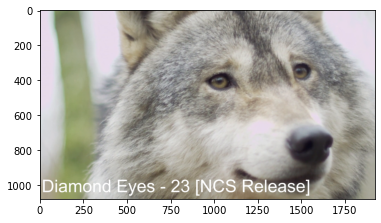

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('thumbnail.png')
imgplot = plt.imshow(img)
plt.show()